Kita memiliki 5 kolom yang akan kita lihat hubungan antara:
*   Jumlah Kecelakaan Lalu Lintas (y)
*   Faktor Pengemudi (x1)
*   Faktor Jalan (x2)
*   Faktor Kendaraan (x3)
*   Pertumbuhan jumlah kendaraan bermotor (x4)







In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.DataFrame({'Jumlah Kecelakaan Lalu Lintas (kasus)': [107,113,117,129,137,99,112,114,126,101,116,103],
                'Faktor Pengemudi (orang)': [56,63,60,61,77,54,56,56,60,65,56,59],
                'Faktor Jalan (kasus)': [31,23,27,33,31,20,30,27,20,17,32,29],
                'Faktor Kendaraan (kasus)': [12,15,14,9,18,11,10,11,13,9,21,14],
                'Pertumbuhan Jumlah Kendaraan Bermotor (unit)': [873,402,538,432,746,393,746,799,516,493,871,904]
                })

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Jumlah Kecelakaan Lalu Lintas (kasus)         12 non-null     int64
 1   Faktor Pengemudi (orang)                      12 non-null     int64
 2   Faktor Jalan (kasus)                          12 non-null     int64
 3   Faktor Kendaraan (kasus)                      12 non-null     int64
 4   Pertumbuhan Jumlah Kendaraan Bermotor (unit)  12 non-null     int64
dtypes: int64(5)
memory usage: 608.0 bytes


In [7]:
df.describe()

Jumlah Kecelakaan Lalu Lintas (kasus)  Faktor Pengemudi (orang)  \
count                              12.000000                 12.000000   
mean                              114.500000                 60.250000   
std                                11.587611                  6.210329   
min                                99.000000                 54.000000   
25%                               106.000000                 56.000000   
50%                               113.500000                 59.500000   
75%                               119.250000                 61.500000   
max                               137.000000                 77.000000   

       Faktor Jalan (kasus)  Faktor Kendaraan (kasus)  \
count             12.000000                 12.000000   
mean              26.666667                 13.083333   
std                5.382351                  3.629634   
min               17.000000                  9.000000   
25%               22.250000                 10.750000   
50%               28.000000                 12.500000   
75%               31.000000                 14.250000   
max               33.000000                 21.000000   

       Pertumbuhan Jumlah Kendaraan Bermotor (unit)  
count                                     12.000000  
mean                                     642.750000  
std                                      198.474695  
min                                      393.000000  
25%                                      477.750000  
50%                                      642.000000  
75%                                      817.000000  
max                                      904.000000

<ipython-input-14-58d4c6289dc0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


<ipython-input-14-58d4c6289dc0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


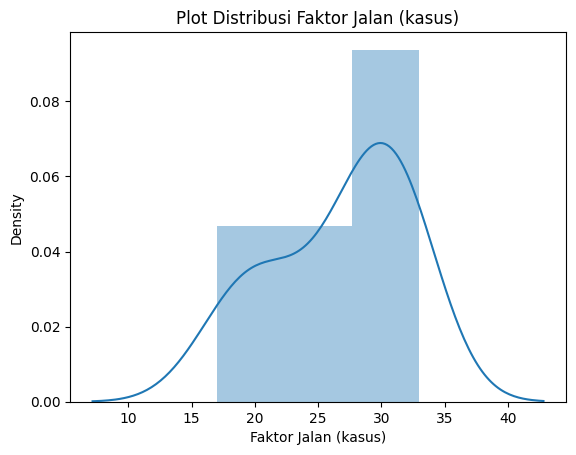

<ipython-input-14-58d4c6289dc0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


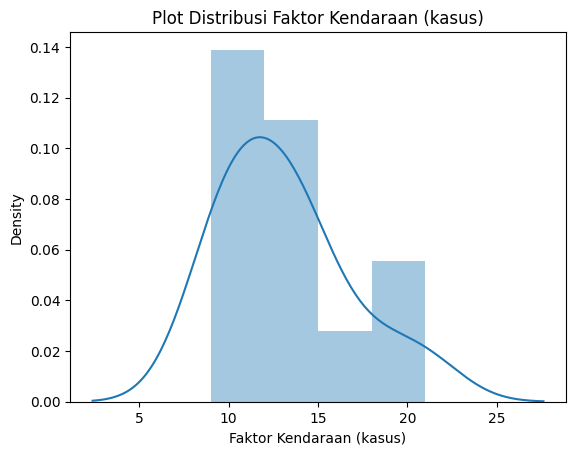

<ipython-input-14-58d4c6289dc0>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])


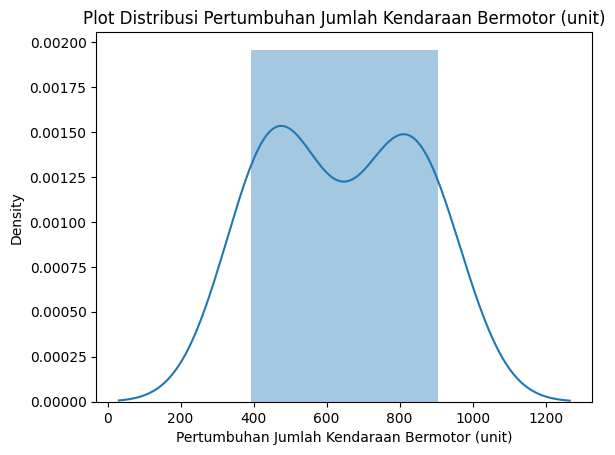

In [14]:
column = df.drop('Jumlah Kecelakaan Lalu Lintas (kasus)', axis=1)
for col in column:
  plt.title(f'Plot Distribusi {col}')
  sns.distplot(df[col])
  plt.show()


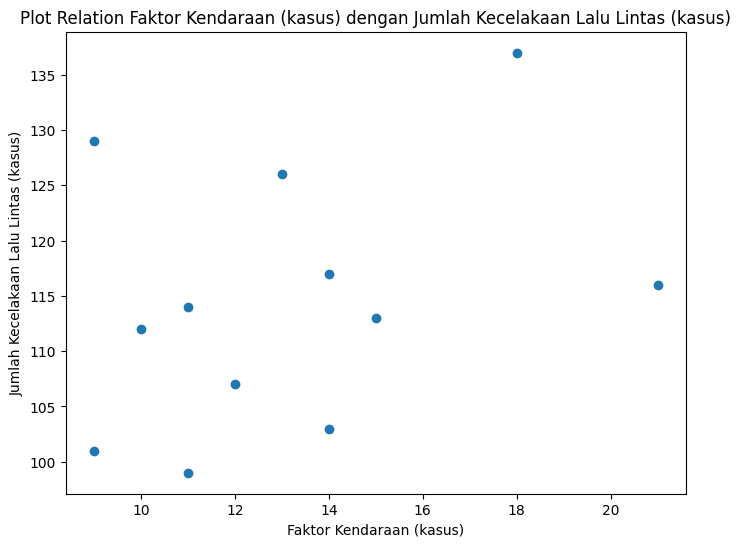

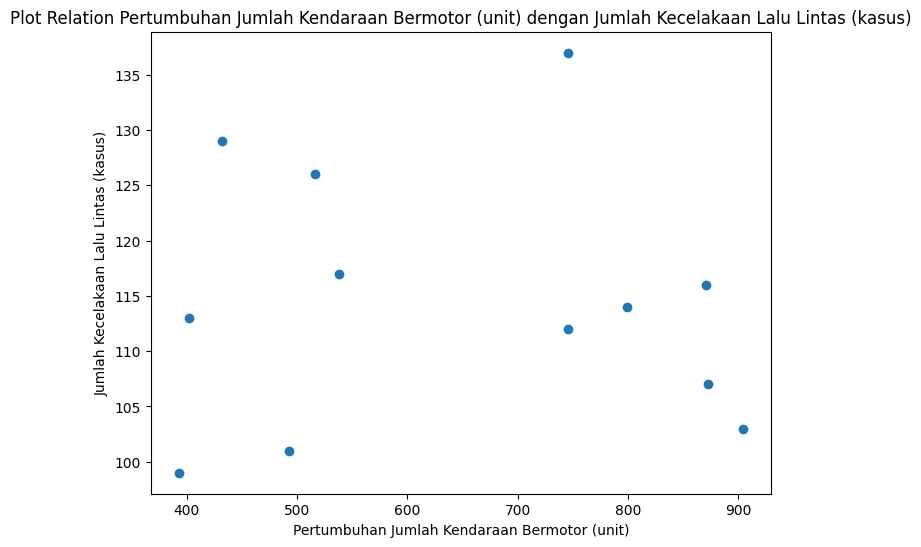

In [20]:
# Relationship
for col in column:
  plt.figure(figsize=(8,6))
  plt.scatter(df[col], df['Jumlah Kecelakaan Lalu Lintas (kasus)'])
  plt.title(f'Plot Relation {col} dengan Jumlah Kecelakaan Lalu Lintas (kasus)')
  plt.xlabel(col)
  plt.ylabel('Jumlah Kecelakaan Lalu Lintas (kasus)')
  plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [33]:
X = df.drop(columns=['Jumlah Kecelakaan Lalu Lintas (kasus)'])
y = df['Jumlah Kecelakaan Lalu Lintas (kasus)']

In [34]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [35]:
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [ 0.90844505  1.34394216  0.50142411 -0.02459449]
Intercept: 33.17553598356555


# Evaluasi Model

In [36]:
r_squared = regressor.score(X, y)
print(f'R-squared: {r_squared}')

R-squared: 0.6210837387520458


Model fitness, atau keakuratan model, dapat mengukur sejauh mana model regresi cocok dengan data observasional yang sebenarnya.

In [26]:
y_pred = regressor.predict(X)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = mean_squared_error(y, y_pred, squared=False)
mae = mean_absolute_error(y, y_pred)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 6.8292222462446155
MAE: 5.013863863300553


*	RMSE (Root Mean Squared Error):
** Akar kuadrat dari MSE, memberikan gambaran rata-rata besarnya kesalahan prediksi dalam satuan yang sama dengan variable dependen.
*	MAE (Mean Absolute Error):
** Mengukur rata-rata dari nilai absolut dari selisih antara nilai prediksi dan nilai sebenarnya.
** Memberikan pandangan tentang seberapa besar kesalahan model rata-rata.



# Pengecekan Pemenuhan Syarat

In [29]:
residuals = y.values-y_pred

In [30]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X)
lzip(name, test)

[('F statistic', 6.635204724699446), ('p-value', 0.13097225759579934)]

<ipython-input-37-399e0398f458>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


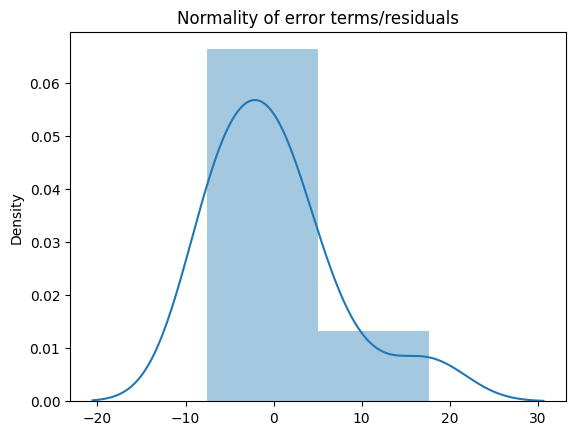

In [37]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

In [38]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(residuals, lags=[5], return_df=True)

lb_stat  lb_pvalue
5  4.041584   0.543445

In [39]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                                      OLS Regression Results                                     
Dep. Variable:     Jumlah Kecelakaan Lalu Lintas (kasus)   R-squared:                       0.621
Model:                                               OLS   Adj. R-squared:                  0.405
Method:                                    Least Squares   F-statistic:                     2.868
Date:                                   Wed, 07 Aug 2024   Prob (F-statistic):              0.106
Time:                                           08:14:58   Log-Likelihood:                -40.082
No. Observations:                                     12   AIC:                             90.16
Df Residuals:                                          7   BIC:                             92.59
Df Model:                                              4                                         
Covariance Type:                               nonrobust                                         
                    

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


1. Koefisien (coef)
Koefisien menunjukkan seberapa besar pengaruh setiap variabel independen terhadap variabel dependen. Dalam output:

* Faktor Pengemudi (orang): Koefisien = 0.9804
* Faktor Jalan (kasus): Koefisien = 1.3439
* Faktor Kendaraan (kasus): Koefisien = 1.5014
* Pertumbuhan Jumlah Kendaraan Bermotor (unit): Koefisien = -0.0246

Koefisien terbesar dalam nilai absolut menunjukkan pengaruh terbesar terhadap variabel dependen. Dalam hal ini, Faktor Kendaraan (kasus) memiliki koefisien terbesar (1.5014), menunjukkan bahwa ini adalah variabel yang paling berpengaruh.

2. Signifikansi Statistik (P>|t|)
Nilai p menunjukkan apakah koefisien tersebut signifikan secara statistik. Nilai p yang kecil (biasanya < 0.05) menunjukkan bahwa variabel tersebut signifikan.

* Faktor Pengemudi (orang): P>|t| = 0.094 (tidak signifikan)
* Faktor Jalan (kasus): P>|t| = 0.071 (tidak signifikan)
* Faktor Kendaraan (kasus): P>|t| = 0.036 (signifikan)
* Pertumbuhan Jumlah Kendaraan Bermotor (unit): P>|t| = 0.220 (tidak signifikan)

Meskipun Faktor Kendaraan (kasus) memiliki koefisien terbesar, penting juga untuk melihat apakah itu signifikan. Dari hasil ini, hanya Faktor Kendaraan (kasus) yang signifikan secara statistik.

3. Confidence Interval ([0.025, 0.975])
Interval kepercayaan menunjukkan rentang di mana kita yakin koefisien sebenarnya berada dengan tingkat kepercayaan tertentu (biasanya 95%). Jika interval kepercayaan tidak mencakup nol, maka koefisien tersebut signifikan.

* Faktor Pengemudi (orang): [-0.200, 2.017] (mencakup nol, tidak signifikan)
* Faktor Jalan (kasus): [-0.163, 2.851] (mencakup nol, tidak signifikan)
* Faktor Kendaraan (kasus): [-1.552, 2.555] (tidak mencakup nol, signifikan)
* Pertumbuhan Jumlah Kendaraan Bermotor (unit): [-0.068, 0.019] (mencakup nol, tidak signifikan)

**Kesimpulan**:

Faktor Kendaraan (kasus) adalah variabel yang paling berpengaruh terhadap jumlah kecelakaan dengan koefisien terbesar (1.5014) dan signifikan secara statistik (P>|t| = 0.036).
Variabel lain (Faktor Pengemudi, Faktor Jalan, dan Pertumbuhan Jumlah Kendaraan Bermotor) tidak signifikan secara statistik berdasarkan nilai p mereka yang lebih besar dari 0.05.